# penguin clustering

### Importing Libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN



### Loading data

In [6]:
df=pd.read_csv('data\penguins_size.csv')

### Data Overview

In [7]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<Axes: ylabel='count'>

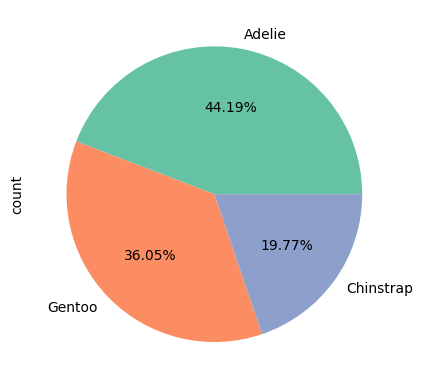

In [13]:
species=df.species.value_counts()
species.plot(kind='pie',autopct="%.2f%%",colors=sns.color_palette('Set2'))

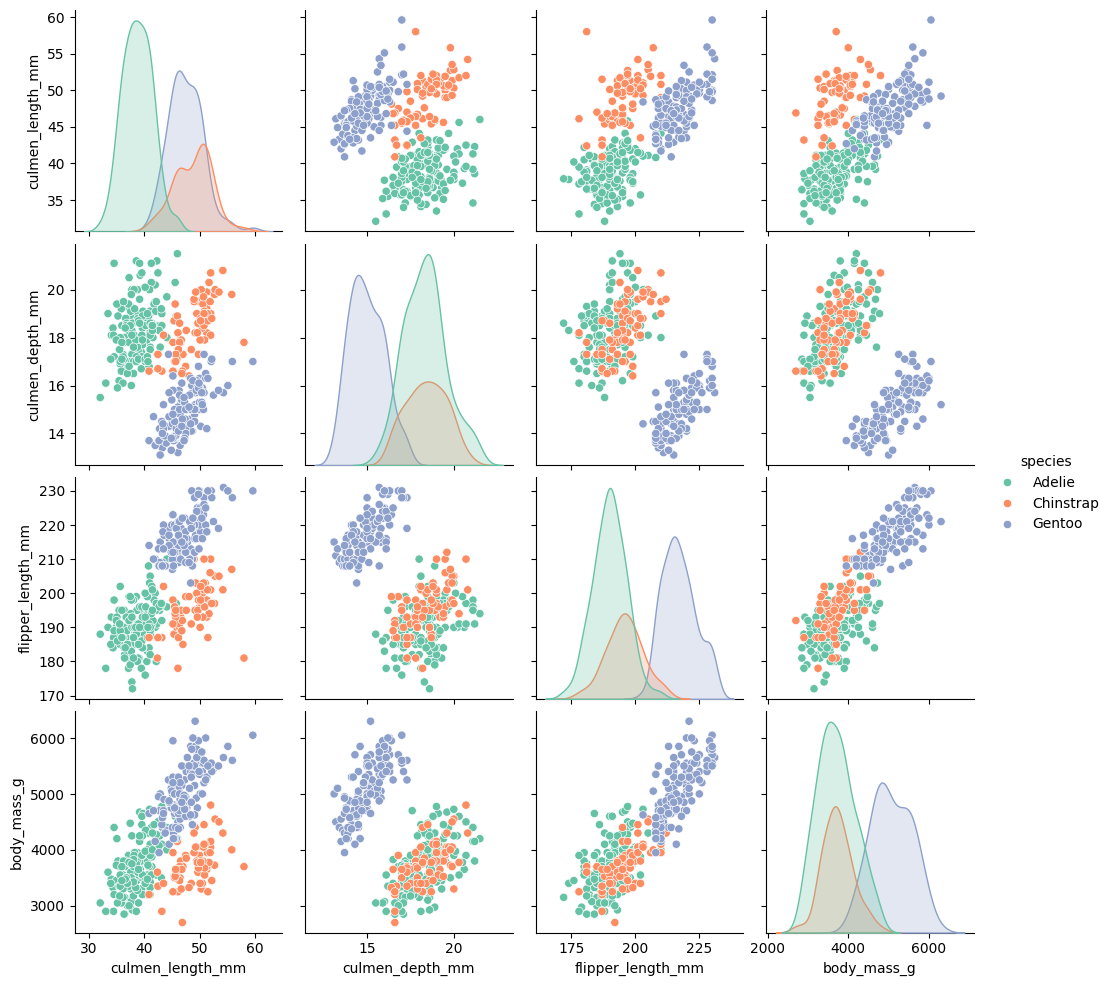

In [14]:
sns.pairplot(df, hue='species', palette='Set2')
plt.show()

### Preprocessing

In [15]:
#Remove nulls
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df=df.dropna()

In [16]:
#Encode Categorical Columns
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])


C:\Users\sara\AppData\Local\Temp\ipykernel_15768\358365435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = label_encoder.fit_transform(df['sex'])


In [17]:
#one-hot encoding
df = pd.get_dummies(df, columns=['island'], drop_first=True)  # drop_first to avoid multicollinearity


In [18]:
#Scaling Numerical columns 
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,-0.884499,0.785449,-1.418347,-0.564142,2,False,True
1,Adelie,-0.811126,0.126188,-1.062250,-0.501703,1,False,True
2,Adelie,-0.664380,0.430462,-0.421277,-1.188532,1,False,True
4,Adelie,-1.324737,1.089724,-0.563715,-0.938776,1,False,True
5,Adelie,-0.847812,1.748985,-0.777373,-0.689020,2,False,True
...,...,...,...,...,...,...,...,...
338,Gentoo,0.601305,-1.750171,0.931890,0.903175,1,False,False
340,Gentoo,0.527932,-1.445897,1.003109,0.809516,1,False,False
341,Gentoo,1.188289,-0.735923,1.501644,1.933419,2,False,False
342,Gentoo,0.234440,-1.192335,0.789451,1.246590,1,False,False


In [20]:
df['island_Dream'] = df['island_Dream'].astype(int)
df['island_Torgersen'] = df['island_Torgersen'].astype(int)
df


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,-0.884499,0.785449,-1.418347,-0.564142,2,0,1
1,Adelie,-0.811126,0.126188,-1.062250,-0.501703,1,0,1
2,Adelie,-0.664380,0.430462,-0.421277,-1.188532,1,0,1
4,Adelie,-1.324737,1.089724,-0.563715,-0.938776,1,0,1
5,Adelie,-0.847812,1.748985,-0.777373,-0.689020,2,0,1
...,...,...,...,...,...,...,...,...
338,Gentoo,0.601305,-1.750171,0.931890,0.903175,1,0,0
340,Gentoo,0.527932,-1.445897,1.003109,0.809516,1,0,0
341,Gentoo,1.188289,-0.735923,1.501644,1.933419,2,0,0
342,Gentoo,0.234440,-1.192335,0.789451,1.246590,1,0,0


### Model Training


#### kmeans

In [22]:
# Selected features
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g','island_Dream','island_Torgersen']]

c:\Users\sara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

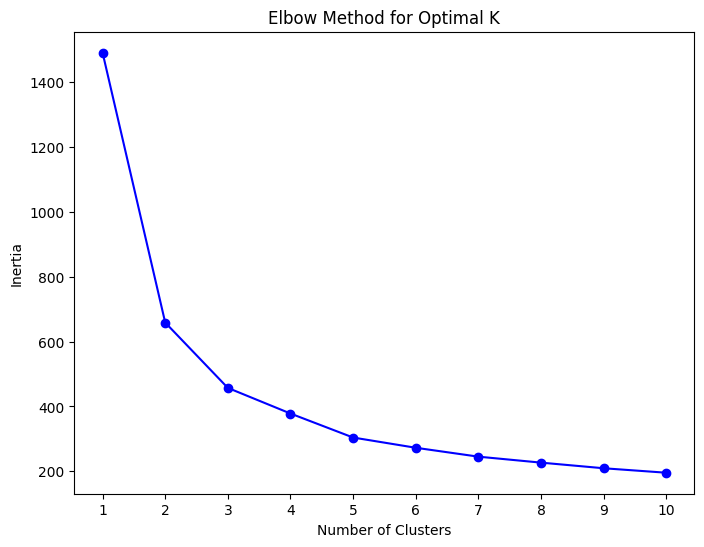

In [23]:
# Calculate inertia for different cluster numbers
inertia = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
# Apply KMeans with the optimal number of clusters
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_pred = kmeans.fit_predict(X)


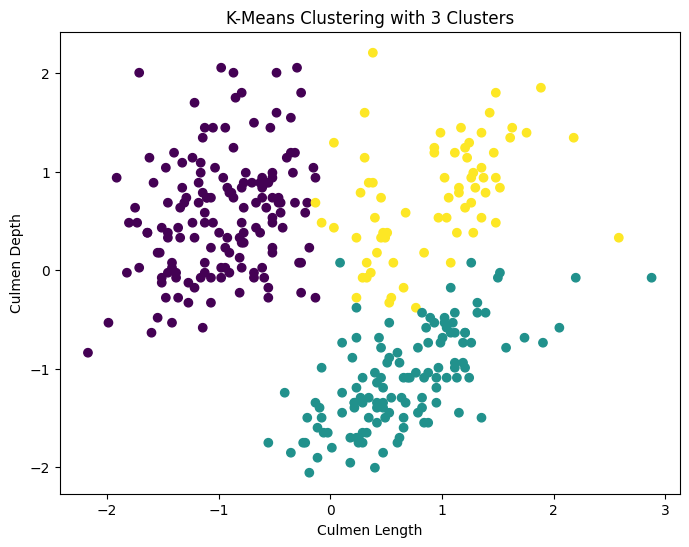

In [25]:
# Plotting the clusters (use two features for simplicity)
X=X.values
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.show()


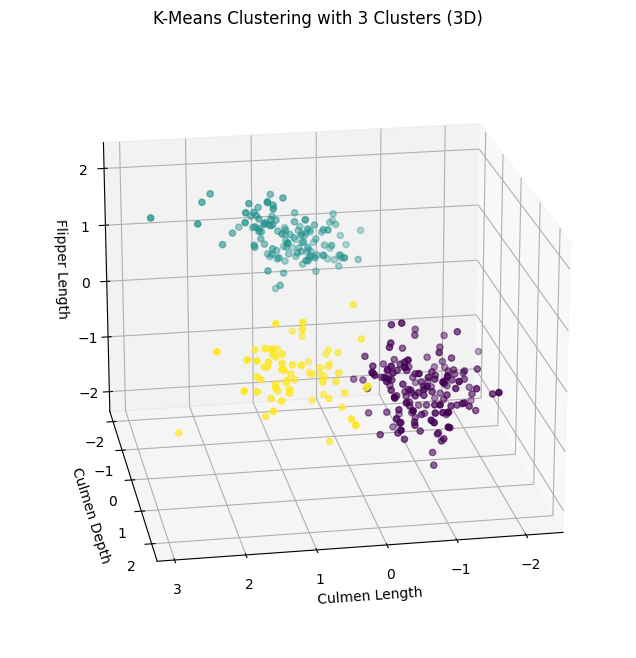

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D (using three features)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred, cmap='viridis')

ax.set_xlabel('Culmen Length')
ax.set_ylabel('Culmen Depth')
ax.set_zlabel('Flipper Length')
plt.title(f'K-Means Clustering with {optimal_k} Clusters (3D)')
ax.view_init(elev=20, azim=80)
plt.show()


##### DBSCAN

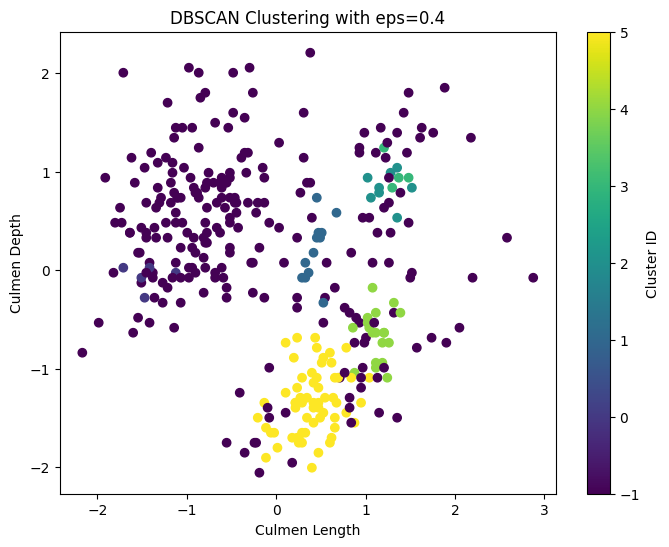

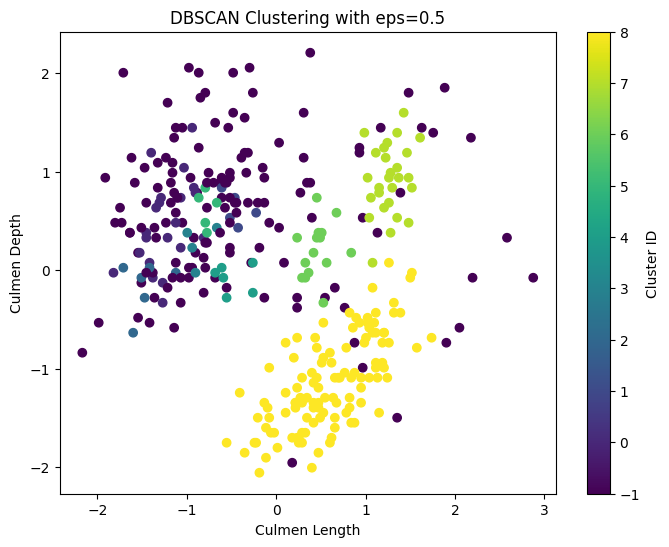

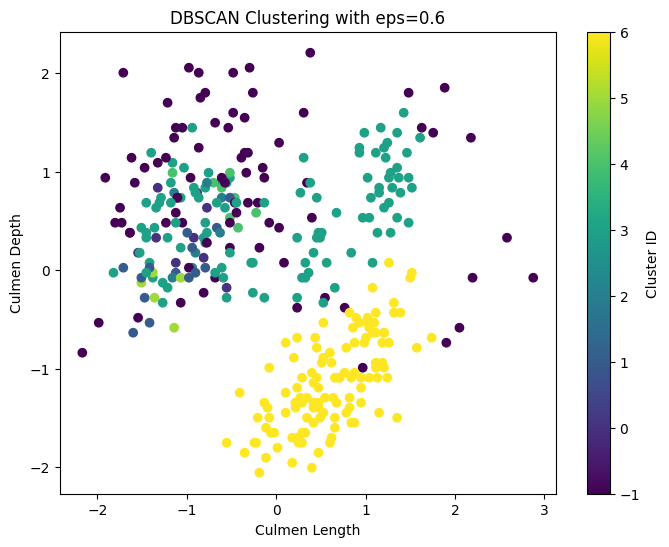

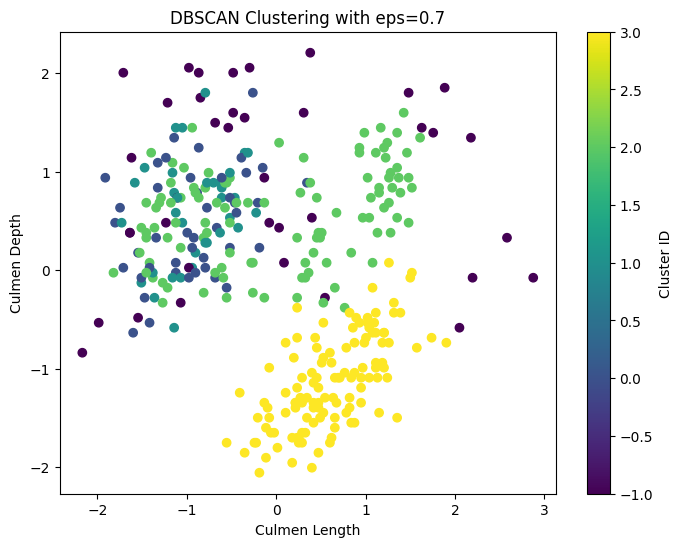

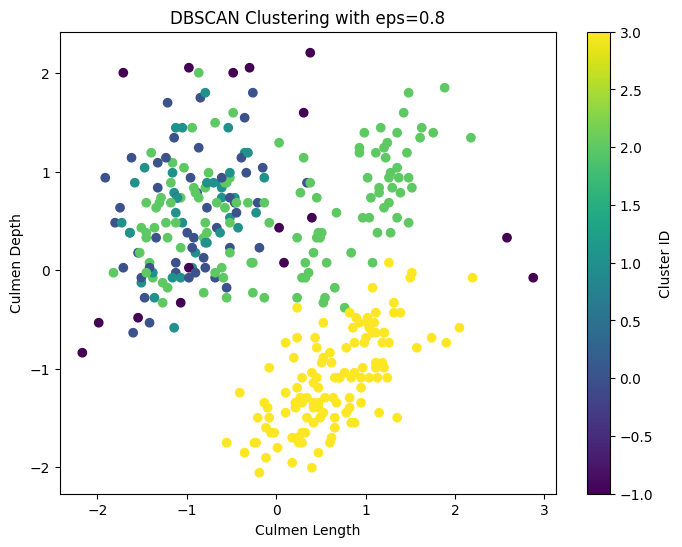

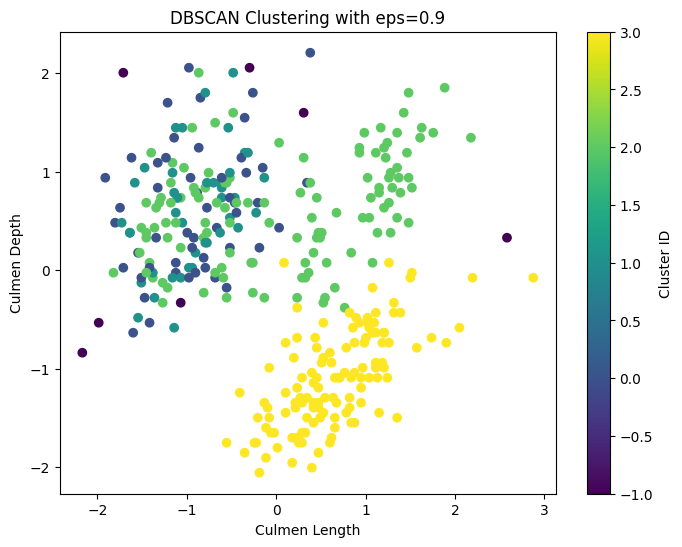

In [51]:
dbscan_params = [
    {'eps': 0.4, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.6, 'min_samples': 5},
    {'eps': 0.7, 'min_samples': 5},
    {'eps': 0.8, 'min_samples': 5},
    {'eps': 0.9, 'min_samples': 5},
]

dbscan_models = {}
dbscan_cluster_counts = {}

# Perform DBSCAN clustering for each set of parameters
for params in dbscan_params:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X)
    
    # Store the labels for each eps value
    dbscan_models[params['eps']] = labels
    
    # Count clusters and noise
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 indicates noise points
    n_noise = list(labels).count(-1)
    
    dbscan_cluster_counts[params['eps']] = {'clusters': n_clusters, 'noise': n_noise}
    
    # Plot the clustering results for each eps value
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'DBSCAN Clustering with eps={params["eps"]}')
    plt.xlabel('Culmen Length')
    plt.ylabel('Culmen Depth')
    plt.colorbar(label='Cluster ID')
    plt.show()


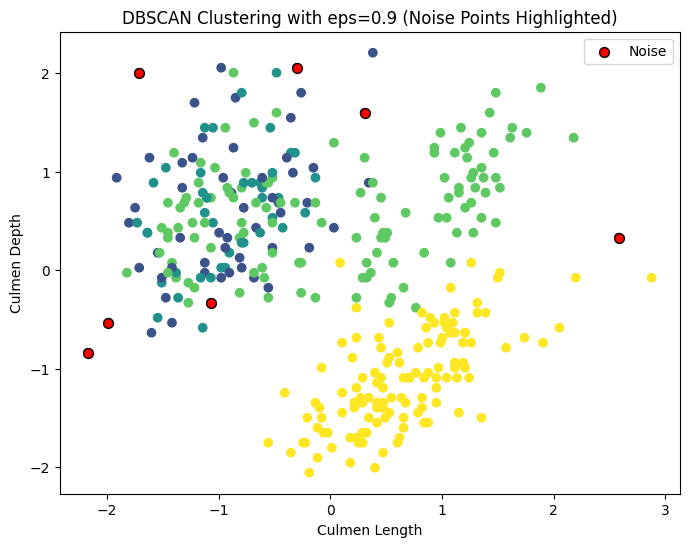

In [53]:
# Plot DBSCAN results and highlight noise points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='o')

# Highlight the noise points in red
plt.scatter(X[dbscan_labels == -1, 0], X[dbscan_labels == -1, 1], color='red', label='Noise', s=50, edgecolor='black')

plt.title('DBSCAN Clustering with eps=0.9 (Noise Points Highlighted)')
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')
plt.legend()
plt.show()


In [54]:
# Count the number of clusters (excluding noise)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

print(f'Number of clusters (DBSCAN): {n_clusters_dbscan}')
print(f'Number of noise points (DBSCAN): {n_noise_dbscan}')


Number of clusters (DBSCAN): 4
Number of noise points (DBSCAN): 7


c:\Users\sara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


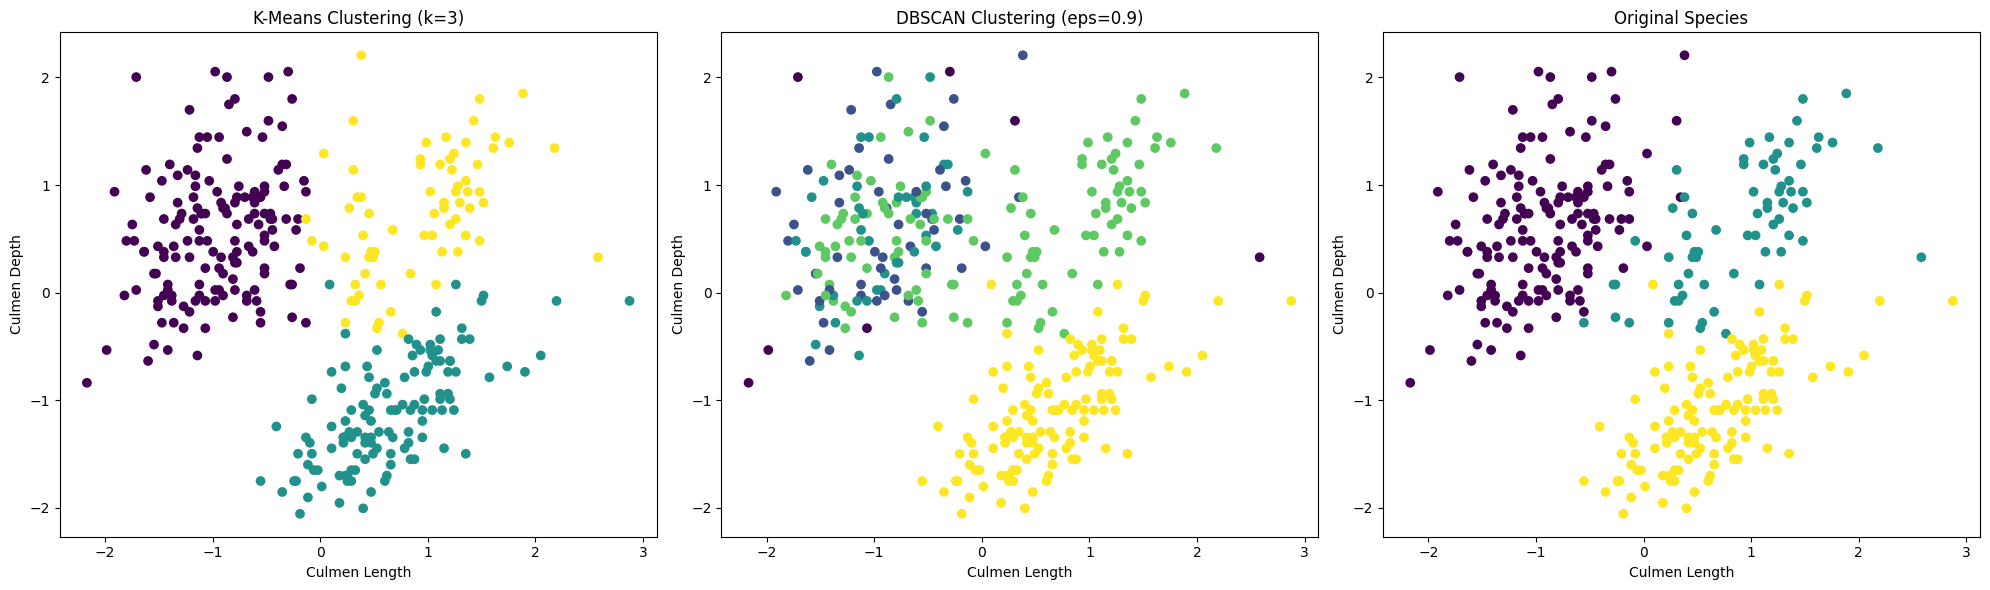

In [56]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN Clustering with eps=0.5
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plotting the comparison of K-Means and DBSCAN clustering
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-means Plot
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
axes[0].set_title('K-Means Clustering (k=3)')
axes[0].set_xlabel('Culmen Length')
axes[0].set_ylabel('Culmen Depth')

# DBSCAN Plot
axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
axes[1].set_title('DBSCAN Clustering (eps=0.9)')
axes[1].set_xlabel('Culmen Length')
axes[1].set_ylabel('Culmen Depth')

# Original Species Plot
axes[2].scatter(X[:, 0], X[:, 1], c=df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}), cmap='viridis', marker='o')
axes[2].set_title('Original Species')
axes[2].set_xlabel('Culmen Length')
axes[2].set_ylabel('Culmen Depth')

plt.tight_layout()
plt.show()

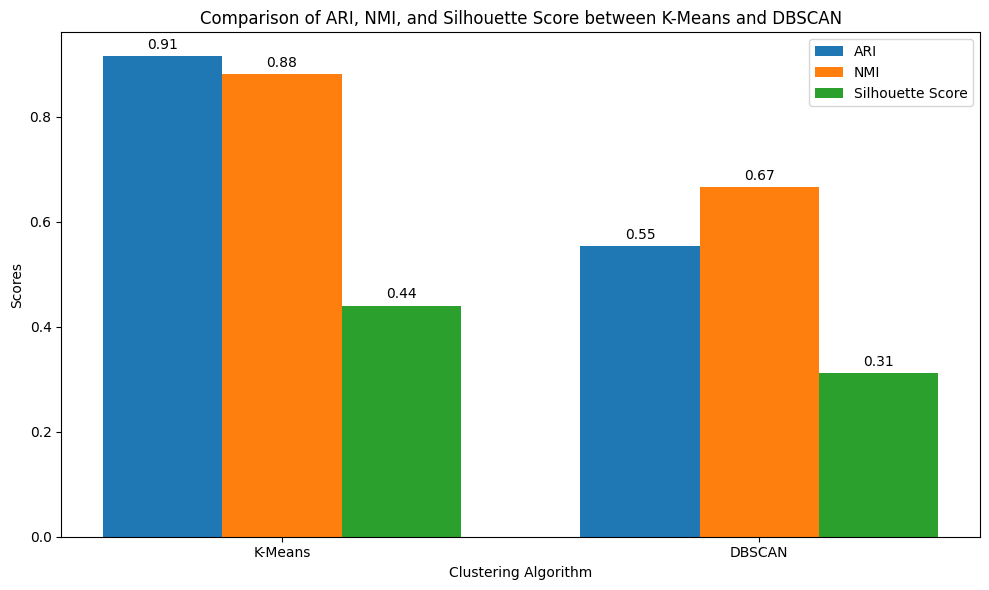

In [58]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

# Calculate Adjusted Rand Index (ARI)
ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
ari_dbscan = adjusted_rand_score(true_labels, dbscan_labels)

# Calculate Normalized Mutual Information (NMI)
nmi_kmeans = normalized_mutual_info_score(true_labels, kmeans_labels)
nmi_dbscan = normalized_mutual_info_score(true_labels, dbscan_labels)

# Calculate Silhouette Score
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_dbscan = silhouette_score(X, dbscan_labels)

# Labels for the algorithms
algorithms = ['K-Means', 'DBSCAN']

# Set up the plot
x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting ARI, NMI, and Silhouette Score as bar charts
rects1 = ax.bar(x - width, [ari_kmeans, ari_dbscan], width, label='ARI')
rects2 = ax.bar(x, [nmi_kmeans, nmi_dbscan], width, label='NMI')
rects3 = ax.bar(x + width, [silhouette_kmeans, silhouette_dbscan], width, label='Silhouette Score')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Clustering Algorithm')
ax.set_ylabel('Scores')
ax.set_title('Comparison of ARI, NMI, and Silhouette Score between K-Means and DBSCAN')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Automatically add the value labels on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()  # Get the height of each bar
        ax.annotate(f'{height:.2f}',  # Annotate with the height value
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels for ARI, NMI, and Silhouette Score bars
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#suggested: K-Means
"""K-Means is good at identifying compact, spherical clusters with similar densities"""

"""DBSCAN is better suited for identifying clusters of arbitrary shape and size, 
    as well as handling noise or outliers in the data."""


<img src="data/photo.jpg" width="400" height="450">    <img src="data/photo2.png" width="500" height="400">